## Imports


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [41]:
dfs = pd.read_csv(r'D:\Projetos Python\Data-Projects\creditcard.csv')[:80_000]
dfs.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [42]:
X = dfs.drop(columns = ['Time', 'Amount','Class']).values
y = dfs['Class'].values

f'Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}'

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [7]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X,y).predict(X).sum() #found less cases than dataset actually have

#Setting to improve it
mod = LogisticRegression(class_weight={0:1, 1:2},max_iter=1000)
mod.fit(X,y).predict(X).sum()

#Find the best value to class weight

171

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator= LogisticRegression(max_iter = 1000),
    param_grid= {'class_weight': [{0:1,1:v} for v in range (1,4)]},
    cv = 4,
    n_jobs = -1)

grid.fit(X,y)


In [10]:
pd.DataFrame(grid.cv_results_)

#Mean_test_score means good accuracy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.550655,0.220336,0.004751,0.001786,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.395620,0.250998,0.006001,0.001870,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,1.467871,0.089861,0.004501,0.002062,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [12]:
from sklearn.metrics import precision_score, recall_score

#Given that I predict fraud how accurate am I?
print(precision_score(y, grid.predict(X)))

#did I get all the fraud cases?
print(recall_score(y, grid.predict(X)))

#How to maximize both cases?
#Add to the Drid Search!!

0.7682119205298014
0.5918367346938775


In [15]:
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator= LogisticRegression(max_iter = 1000),
    param_grid= {'class_weight': [{0:1,1:v} for v in range (1,4)]},
    cv = 4,
    n_jobs = -1,
    scoring={'precision': make_scorer(precision_score), 'recall_score':make_scorer(recall_score)},
    refit='precision', #Wich score it has to optimize
    return_train_score= True
    )

grid.fit(X,y)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [16]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.588415,0.277980,0.014254,0.004817,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.0,0.952381,0.857143,...,0.122449,0.545918,0.331397,3,0.863946,0.585034,0.530612,0.693878,0.668367,0.127301
1,1.544157,0.268700,0.018252,0.006761,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.0,0.955556,0.812500,...,0.265306,0.602041,0.297672,2,0.870748,0.659864,0.632653,0.782313,0.736395,0.095889
2,1.631175,0.231954,0.016254,0.006302,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.0,0.955556,0.800000,...,0.326531,0.627551,0.281816,1,0.870748,0.714286,0.680272,0.816327,0.770408,0.076568


In [17]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter = 1000),
    param_grid= {'class_weight': [{0:1,1:v} for v in np.linspace (1,20,30)]},
    cv = 10,
    n_jobs = -1,
    scoring={'precision': make_scorer(precision_score), 'recall_score':make_scorer(recall_score)},
    refit='precision', #Wich score it has to optimize
    return_train_score= True
    )

grid.fit(X,y)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [29]:
pd.DataFrame(grid.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,2.257194,0.327613,0.016978,0.006767,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.0,0.463415,0.583333,1.0,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,2.375287,0.340048,0.017193,0.003716,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.0,0.463415,0.583333,1.0,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,2.076112,0.175213,0.019278,0.007558,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.0,0.463415,0.583333,1.0,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,2.273514,0.315287,0.015195,0.002981,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.0,0.452381,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.956979,0.300911,0.014804,0.003895,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.0,0.452381,0.583333,1.0,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959


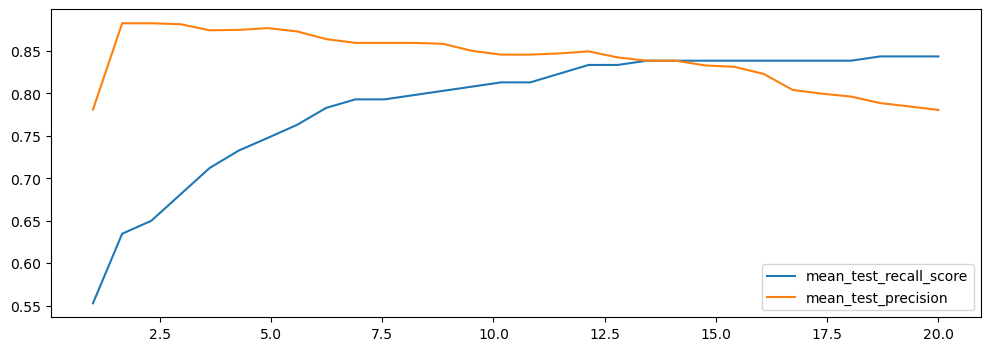

In [31]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend()

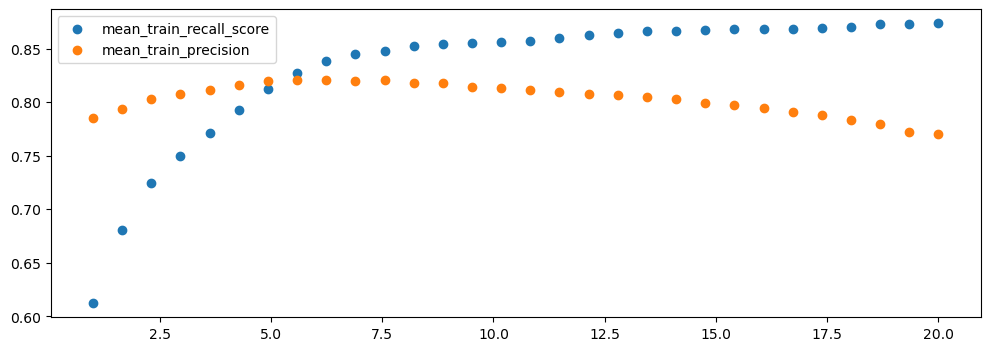

In [32]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.scatter(x = [_[1] for _ in df['param_class_weight']],
             y = df[score.replace('test', 'train')],
             label=score)
plt.legend()

## Optimizing for min recall and precision

In [33]:
def min_recall_precision_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [34]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter = 1000),
    param_grid= {'class_weight': [{0:1,1:v} for v in np.linspace (1,20,30)]},
    cv = 10,
    n_jobs = -1,
    scoring={'precision': make_scorer(precision_score), 'recall_score':make_scorer(recall_score), 'min_both': make_scorer(min_recall_precision_score)},
    refit='min_both', #Wich score it has to optimize
    return_train_score= True
    )

grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision_score),
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

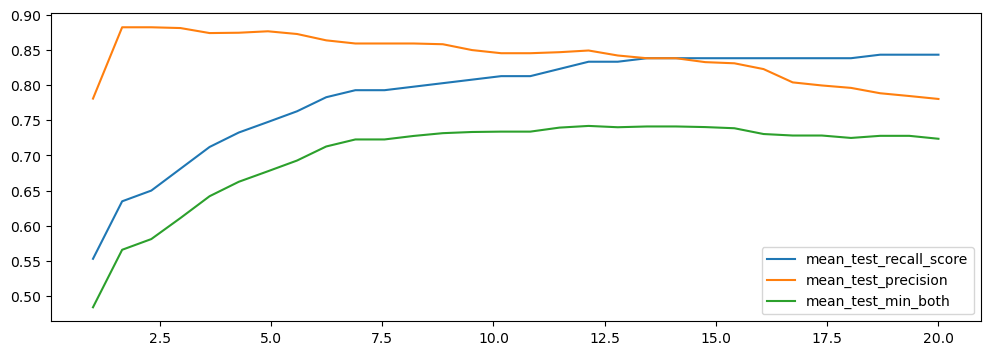

In [35]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend()

In [ ]:
s = make_scorer(min_recall_precision_score)
??s

In [39]:
#Redefining the function to add a new feature, based on the make_scorer way to work

def min_recall_precision_score(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [43]:
grid = GridSearchCV(
    estimator= LogisticRegression(max_iter = 1000),
    param_grid= {'class_weight': [{0:1,1:v} for v in np.linspace (1,20,30)]},
    cv = 10,
    n_jobs = -1,
    scoring={'precision': make_scorer(precision_score), 'recall_score':make_scorer(recall_score), 'min_both': min_recall_precision_score},
    refit='min_both', #Wich score it has to optimize
    return_train_score= True
    )

grid.fit(X,y, sample_weight = np.log(1+dfs['Amount']))

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': <function min_recall_precision_score at 0x000002319B648CC0>,
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

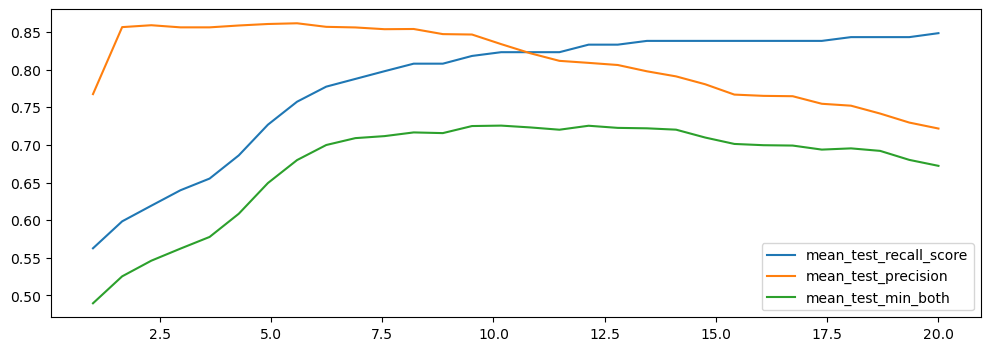

In [44]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend()

## Fraud as an Outlier

In [47]:
from collections import Counter
from sklearn.ensemble import IsolationForest

mod = IsolationForest().fit(X)
mod.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
Counter(mod.predict(X))

# 1 Represents Not outlier
# -1 Represents an outlier

Counter({1: 77368, -1: 2632})

In [49]:
#Translating it to outlier equal to 1 and not outlier equal to 0

np.where(mod.predict(X)== -1, 1, 0)



array([0, 0, 0, ..., 0, 0, 0])

In [53]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds ==-1,1,0))

def outlier_recall (mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds ==-1,1,0))

grid = GridSearchCV(
    estimator= IsolationForest(),
    param_grid= {'contamination':  np.linspace (0.001,0.02,10)},
    cv = 5,
    n_jobs = -1,
    scoring={'precision': outlier_precision, 'recall_score': outlier_recall},
    refit='precision', #Wich score it has to optimize
        )

grid.fit(X,y)

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x000002319B684B80>,
                      'recall_score': <function outlier_recall at 0x0000023192241260>})

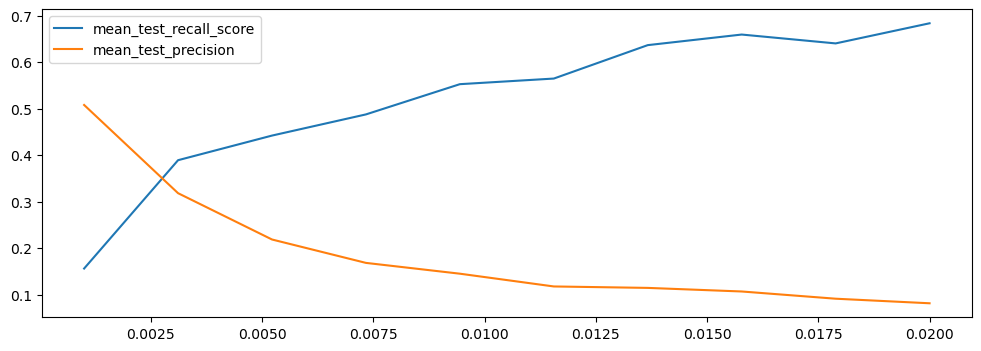

In [54]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot(df['param_contamination'],
             df[score],
             label=score)
plt.legend()